In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from regression_model import forecast_RULs, transformer, capacity_points, POLYNOMIAL_DEGREE
import regression_model
import sklearn.metrics
import importlib
importlib.reload(regression_model)

<module 'regression_model' from 'c:\\Users\\Thom van den Hil\\Desktop\\modelleren-2a-14\\src\\regression_model.py'>

# Point forecasts

3


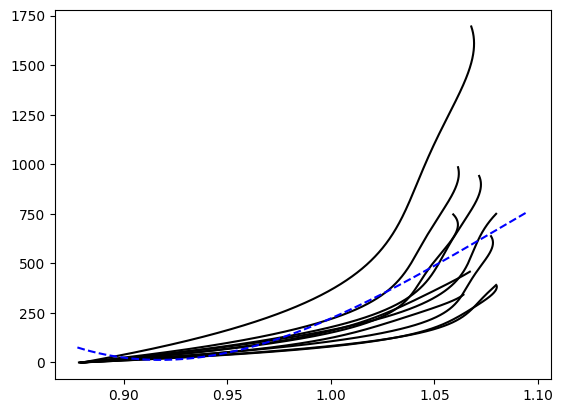

In [100]:
battery_test = pd.read_csv('../data/battery_test.csv')
battery_test_capacities = battery_test.drop(columns=['Cycle'])
battery_test_RULs = battery_test_capacities.copy()

for battery in battery_test_capacities:
    capacities = battery_test[battery].dropna()
    total_useful_life = len(capacities)
    # print(len(battery_test_capacities.index) - total_useful_life)
    # print(np.repeat(np.nan, len(battery_test_capacities.index) - total_useful_life))
    battery_test_RULs[battery] = np.append(np.arange(total_useful_life - 1, -1, -1), np.repeat(np.nan, len(battery_test_capacities.index) - total_useful_life))

for battery in battery_test_RULs:
    x = battery_test_capacities[battery].dropna()
    y = battery_test_RULs[battery].dropna()
    yeet = plt.plot(x, y, color='black', linestyle='solid')

N = 200
x_linspace = np.linspace(np.min(regression_model.capacity_points), np.max(regression_model.capacity_points), N)
y_pred = regression_model.forecast_RULs(x_linspace)
plt.plot(x_linspace, y_pred, color='blue', linestyle='dashed')
print(regression_model.POLYNOMIAL_DEGREE)

# Prediction performance

In [104]:
# y_true = np.array([[]])
# y_pred = np.array([[]])

# for battery in battery_test_RULs:
#     RULs = battery_test[battery]
#     y_true = np.append(y_true, RULs.to_numpy().reshape((-1, 1)), axis=1)
    
# print(y_true)
for battery in battery_test_RULs:
    capacities = battery_test_capacities[battery].dropna()
    y_true = battery_test_RULs[battery].dropna()
    y_pred = regression_model.forecast_RULs(capacities)
    mean_absolute_percentage_error = sklearn.metrics.mean_absolute_percentage_error(y_true, y_pred)
    print(f'Mean absolute percentage error battery {battery}: {mean_absolute_percentage_error}')

Mean absolute percentage error battery NO.1: 411944370714774.44
Mean absolute percentage error battery NO.2: 333743512034789.2
Mean absolute percentage error battery NO.3: 323413568878048.2
Mean absolute percentage error battery NO.4: 675770011914213.9
Mean absolute percentage error battery NO.5: 858137706249177.8
Mean absolute percentage error battery NO.6: 489492070275092.2
Mean absolute percentage error battery NO.7: 797702753553681.1
Mean absolute percentage error battery NO.8: 939856228352287.8
Mean absolute percentage error battery NO.9: 414875859773801.94
Mean absolute percentage error battery NO.10: 181984318255645.6
